In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

In [18]:
data=pd.read_csv("D:\Beinex\Python\Dataset-Kaggle\Employee_Data.csv",encoding='windows-1254')
data.head(10)

,Employee ID,Full Name,Job Title,Department,Business Unit,Gender,Ethnicity,Age,Hire Date,Annual Salary,Bonus %,Country,City,Exit Date
0,E02002,Kai Le,Controls Engineer,Engineering,Manufacturing,Male,Asian,47.0,2/5/2022,"$92,368",0%,United States,Columbus,NaN
1,E02003,Robert Patel,Analyst,Sales,Corporate,Male,Asian,58.0,10/23/2013,"$45,703",0%,United States,Chicago,NaN
2,E02004,Cameron Lo,Network Administrator,IT,Research & Development,Male,Asian,34.0,3/24/2019,"$83,576",0%,China,Shanghai,NaN
3,E02005,Harper Castillo,IT Systems Architect,IT,Corporate,Female,Latino,39.0,4/7/2018,"$98,062",0%,United States,Seattle,NaN
4,E02006,Harper Dominguez,Director,Engineering,Corporate,Female,Latino,42.0,6/18/2005,"$175,391",24%,United States,Austin,NaN
5,E02007,Ezra Vu,Network Administrator,IT,Manufacturing,Male,Asian,62.0,4/22/2004,"$66,227",0%,United States,Phoenix,2/14/2014
6,E02008,Jade Hu,Sr. Analyst,Accounting,Specialty Products,Female,Asian,58.0,6/27/2009,"$89,744",0%,China,Chongqing,NaN
7,E02009,Miles Chang,Analyst II,Finance,Corporate,Male,Asian,62.0,2/19/1999,"$69,674",0%,China,Chengdu,NaN
8,E02010,Gianna Holmes,System Administrator,IT,Manufacturing,Female,Caucasian,38.0,9/9/2011,"$97,630",0%,United States,Seattle,NaN
9,E02011,Jameson Thomas,Manager,Finance,Specialty Products,Male,Caucasian,52.0,2/5/2015,"$105,879",10%,United States,Miami,NaN


#### Data cleaning

In [19]:
data.shape

(1262, 14)

In [21]:
data.isna().any()

Employee ID      True
Full Name        True
Job Title        True
Department       True
Business Unit    True
Gender           True
Ethnicity        True
Age              True
Hire Date        True
Annual Salary    True
Bonus %          True
Country          True
City             True
Exit Date        True
dtype: bool

In [148]:
#imputation
#replace na values with the mode values since all of them are dealing with categorical variable
data['workclass'] = data['workclass'].fillna(data['workclass'].mode()[0])
data['occupation'] = data['occupation'].fillna(data['occupation'].mode()[0])
data['native.country'] = data['native.country'].fillna(data['native.country'].mode()[0])

#checking whether there is any na values in data
data.isna().any()


age               False
workclass         False
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation        False
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country    False
income            False
dtype: bool

In [149]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


(array([1.3117e+04, 1.5327e+04, 3.4980e+03, 4.7700e+02, 1.0200e+02,
        2.0000e+01, 1.0000e+01, 5.0000e+00, 2.0000e+00, 3.0000e+00]),
 array([  12285.,  159527.,  306769.,  454011.,  601253.,  748495.,
         895737., 1042979., 1190221., 1337463., 1484705.]),
 <BarContainer object of 10 artists>)

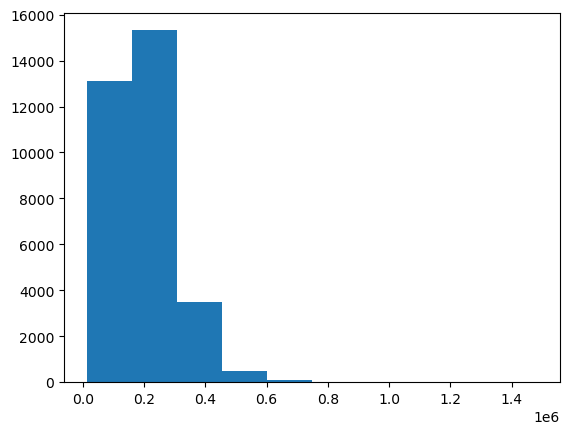

In [150]:
plt.hist(data['fnlwgt'])

In [151]:
data['income'].unique()

array(['<=50K', '>50K'], dtype=object)

In [152]:
#The categorical variable are change to numercal values using LabelEncoder method
data['income']=LabelEncoder().fit_transform(data['income']) #0 coded as <=50K and >50K as 1
data['sex']=LabelEncoder().fit_transform(data['sex']) #0 coded as female and male as 1
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United-States,0


In [153]:
#income column was represented in 0 and 1. However by adding 1 to all values under the variable values changes 
data['income']= data['income']+1
#finding the unique values nder teh coloumn to find whether the code is implemented properly
data['income'].unique()

array([1, 2])

In [154]:
data['native.country'].unique()

array(['United-States', 'Mexico', 'Greece', 'Vietnam', 'China', 'Taiwan',
       'India', 'Philippines', 'Trinadad&Tobago', 'Canada', 'South',
       'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran', 'England',
       'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba', 'Ireland',
       'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic', 'Haiti',
       'El-Salvador', 'Hungary', 'Columbia', 'Guatemala', 'Jamaica',
       'Ecuador', 'France', 'Yugoslavia', 'Scotland', 'Portugal', 'Laos',
       'Thailand', 'Outlying-US(Guam-USVI-etc)'], dtype=object)

In [155]:
#removing "-" values
#changing from United-States to United States 
data['native.country'] = data['native.country'].str.replace('-',' ')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United States,1
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United States,1
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United States,1
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United States,1
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United States,1


In [156]:
data['marital.status'].unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

In [157]:
# Create a new column 'new_labels' using np.where to map labels to 1 or 2
#combining 2 or more labels into 1 label and createing a new coloum 
data['martial_Status'] = np.where(data['marital.status'].isin(['Widowed','Divorced','Separated','Never-married']), 'Single', 'In a relation')
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,martial_Status
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United States,1,Single
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United States,1,Single
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United States,1,Single
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United States,1,Single
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,0,0,3900,40,United States,1,Single


(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

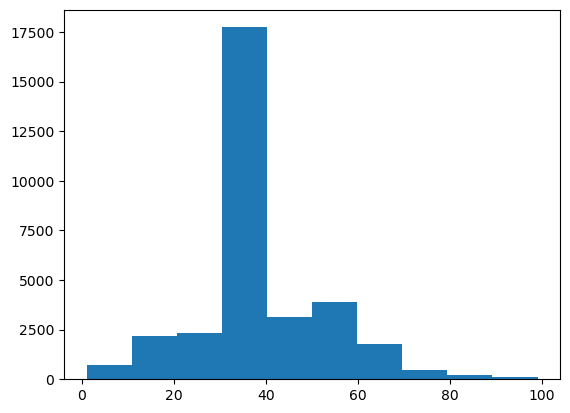

In [158]:
#Hours per week follows normal distribution 
plt.hist(data['hours.per.week'])

<function matplotlib.pyplot.show(close=None, block=None)>

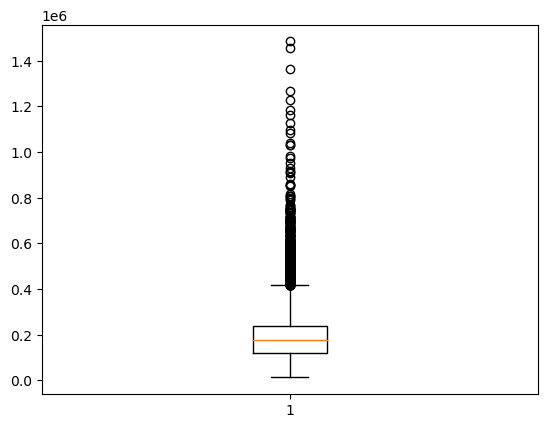

In [159]:
#certain outliers are found in 'fnlwgt' variable.
plt.boxplot(data['fnlwgt'])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

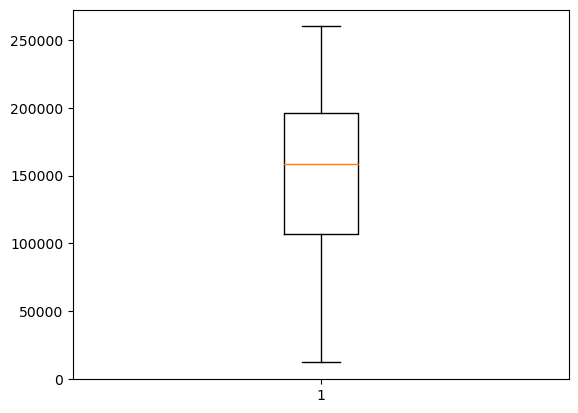

In [160]:
# Calculate the lower and upper thresholds
#lower_threshold = np.percentile(data['fnlwgt'], 5)  # Remove the lowest 5% outliers
outliers=np.percentile(data['fnlwgt'],80)  # Remove the highest 20% outliers

# Remove the lowest and highest outliers by filtering the DataFrame
data=data[data['fnlwgt']<outliers]

#plot the boxplot again to find whther it removed outliers
plt.boxplot(data['fnlwgt'])
plt.show

##outliers removed successfully 

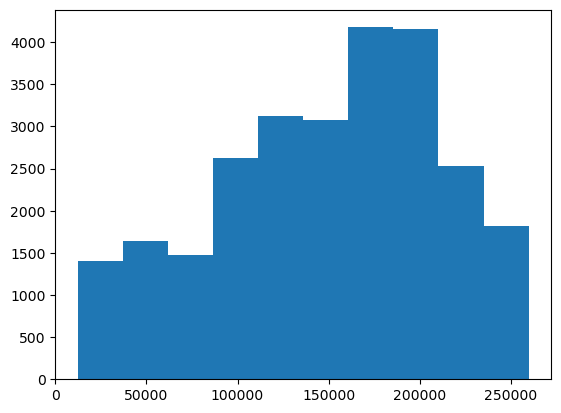

In [170]:
plt.hist(data['fnlwgt'])
#plt.axvline(data['fnlwgt'].mean(), color='red', linestyle='dashed', linewidth=2)
plt.show()

In [162]:
data['workclass'].unique()

array(['Private', 'State-gov', 'Self-emp-not-inc', 'Self-emp-inc',
       'Federal-gov', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

In [163]:
#Rename the 'workclass' to 'Employment_status'
data.rename(columns={'workclass':'Employment_status'},inplace=True)
data.head()


,age,Employment_status,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,martial_Status
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,0,0,4356,40,United States,1,Single
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,0,0,4356,18,United States,1,Single
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,0,0,4356,40,United States,1,Single
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,0,0,3900,40,United States,1,Single
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,0,0,3770,45,United States,1,Single


In [164]:
#data['race']=LabelEncoder().fit_transform(data['race']) 
#data.head()

<BarContainer object of 5 artists>

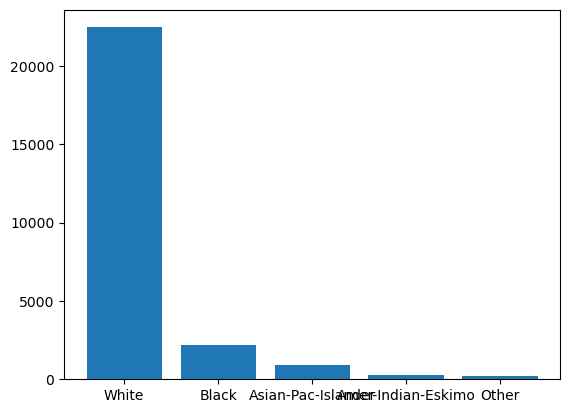

In [167]:
plt.bar(data['race'].value_counts().index,data['race'].value_counts())